In [1]:
#import math
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import matplotlib
#from matplotlib.lines import Line2D
#import re
#matplotlib.rc('text',usetex=True)
#matplotlib.rcParams['font.family'] = 'sans'
#matplotlib.rcParams['font.size'] = 10
#matplotlib.rcParams['legend.fontsize'] = 10
#matplotlib.rcParams['font.serif'] = ['Times New Roman']
#matplotlib.rcParams['lines.linewidth'] = 1.5
#matplotlib.rcParams['lines.markersize'] = 5
#matplotlib.rcParams['lines.markeredgewidth'] = 2
#matplotlib.rcParams['axes.linewidth'] = 1.5
#matplotlib.rcParams['xtick.major.size'] = 5
#matplotlib.rcParams['xtick.minor.size'] = 2
#matplotlib.rcParams['ytick.major.size'] = 5
#matplotlib.rcParams['ytick.minor.size'] = 2

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
import re
matplotlib.rc('text',usetex=True)
matplotlib.rcParams['font.family'] = 'sans'
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['lines.linewidth'] = 2.5
matplotlib.rcParams['lines.markersize'] = 8
matplotlib.rcParams['lines.markeredgewidth'] = 2.5
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['xtick.major.size'] = 12
matplotlib.rcParams['xtick.minor.size'] = 2
matplotlib.rcParams['ytick.major.size'] = 12
matplotlib.rcParams['ytick.minor.size'] = 2
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['axes.titlesize'] = 16
matplotlib.rcParams['figure.subplot.hspace'] = 0.3

In [3]:
#Load data

#CCSDT

water2_cc_file = 'water2-ccsdt-aug-cc-pvtz.dat'
zn_h2o_cc_file = 'zn-hoh-ccsdt-aug-cc-pvtz.dat'
f_h2o_cc_file  = 'f-hoh-ccsdt-aug-cc-pvtz.dat'
cl_h2o_cc_file  = 'cl-hoh-ccsdt-aug-cc-pvtz.dat'
oh_h2o_cc_file  = 'oh-hoh-ccsdt-aug-cc-pvtz.dat'
zn_h2o_cc_lr_file = 'zn-hoh-ccsdt-aug-cc-pvtz-9A.dat'

cc_ref = {}
cc_ref['water2'] = pd.read_csv(water2_cc_file,sep='\s+',header=0,comment='#',index_col=False)
cc_ref['zn_h2o'] = pd.read_csv(zn_h2o_cc_file,sep='\s+',header=0,comment='#')
cc_ref['f_h2o']  = pd.read_csv(f_h2o_cc_file,sep='\s+',header=0,comment='#')
cc_ref['cl_h2o']  = pd.read_csv(cl_h2o_cc_file,sep='\s+',header=0,comment='#')
cc_ref['oh_h2o']  = pd.read_csv(oh_h2o_cc_file,sep='\s+',header=0,comment='#')
cc_ref['zn_h2o_lr'] = pd.read_csv(zn_h2o_cc_lr_file,sep='\s+',header=0,comment='#')

In [4]:
#SAPT2

water2_sapt2_file = 'Result-water2-sapt2-aug-cc-pvtz.dat'
zn_h2o_sapt2_file = 'Result-zn-hoh-sapt2-aug-cc-pvtz.dat'
f_h2o_sapt2_file  = 'Result-f-hoh-sapt2-aug-cc-pvtz.dat'
cl_h2o_sapt2_file = 'Result-cl-hoh-sapt2-aug-cc-pvtz.dat'
oh_h2o_sapt2_file = 'Result-oh-hoh-sapt2-aug-cc-pvtz.dat'
zn_h2o_sapt2_lr_file = 'Result-zn-hoh-sapt2-aug-cc-pvtz-9A.dat'

sapt2 = {}
sapt2['water2'] = pd.read_csv(water2_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['zn_h2o'] = pd.read_csv(zn_h2o_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['f_h2o']  = pd.read_csv(f_h2o_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['cl_h2o'] = pd.read_csv(cl_h2o_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['oh_h2o'] = pd.read_csv(oh_h2o_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['zn_h2o_lr'] = pd.read_csv(zn_h2o_sapt2_lr_file,sep='\s+',header=0,comment='#')


In [5]:
sapt2['zn_h2o_lr']

d        Elec           Rep        Ind       Disp        Tot       Ct  \
0   1.5 -193.281790  2.451383e+02 -86.134161 -14.866447 -49.144099 -14.1998   
1   1.6 -149.589346  1.610316e+02 -75.583923 -11.840471 -75.982128  -3.9558   
2   1.7 -118.839769  1.058955e+02 -67.493045  -9.304616 -89.741960  -0.3151   
3   1.8  -96.862001  6.970993e+01 -60.787515  -7.249945 -95.189528   0.4159   
4   1.9  -80.865222  4.593670e+01 -54.893840  -5.619525 -95.441885   0.0709   
5   2.0  -68.981460  3.030353e+01 -49.524063  -4.343223 -92.545218  -0.5246   
6   2.1  -59.954806  2.001305e+01 -44.545673  -3.353079 -87.840509  -1.0404   
7   2.2  -52.937222  1.323168e+01 -39.906589  -2.589440 -82.201575  -1.3744   
8   2.3  -47.353481  8.757298e+00 -35.593255  -2.002668 -76.192106  -1.5253   
9   2.4  -42.810837  5.801503e+00 -31.607450  -1.552738 -70.169522  -1.5312   
10  2.5  -39.038604  3.846719e+00 -27.953710  -1.208002 -64.353596  -1.4397   
11  2.6  -35.847980  2.552670e+00 -24.632951  -0.943753 -58.872014  -1.2936   
12  2.7  -33.105514  1.695267e+00 -21.639923  -0.740883 -53.791053  -1.1251   
13  2.8  -30.715560  1.126716e+00 -18.963038  -0.584724 -49.136607  -0.9555   
14  2.9  -28.608564  7.494200e-01 -16.585448  -0.464096 -44.908687  -0.7972   
15  3.0  -26.733082  4.988600e-01 -14.486606  -0.370516 -41.091345  -0.6562   
16  3.4  -20.891570  9.876263e-02  -8.415316  -0.159840 -29.367963  -0.2747   
17  3.8  -16.802946  1.974340e-02  -5.001032  -0.075865 -21.860100  -0.1025   
18  4.2  -13.811220  3.923990e-03  -3.123305  -0.039362 -16.969964  -0.0356   
19  4.6  -11.554667  7.768400e-04  -2.066835  -0.022015 -13.642739  -0.0125   
20  5.0   -9.808470  1.591700e-04  -1.438326  -0.013062 -11.259698  -0.0046   
21  5.4   -8.428963  3.423000e-05  -1.040690  -0.008119  -9.477737  -0.0018   
22  5.8   -7.320258  6.860000e-06  -0.775615  -0.005241  -8.101107  -0.0008   
23  6.2   -6.415963  8.000000e-07  -0.591605  -0.003491  -7.011058  -0.0004   
24  6.6   -5.668876 -2.500000e-07  -0.459844  -0.002389  -6.131109  -0.0002   
25  7.0   -5.044653 -2.400000e-07  -0.363153  -0.001674  -5.409480  -0.0001   
26  7.4   -4.517821 -8.000000e-08  -0.290758  -0.001197  -4.809777  -0.0000   
27  7.8   -4.069179  4.000000e-08  -0.235627  -0.000872  -4.305677  -0.0000   
28  8.2   -3.684027  7.000000e-08  -0.193019  -0.000645  -3.877691  -0.0000   
29  8.6   -3.350956  5.000000e-08  -0.159655  -0.000485  -3.511095   0.0000   
30  9.0   -3.061002  2.000000e-08  -0.133220  -0.000369  -3.194591   0.0000   

          dHF  
0   73.193128  
1   41.927858  
2   24.888403  
3   14.708922  
4    8.108718  
5    3.608204  
6    0.496163  
7   -1.616148  
8   -2.979104  
9   -3.777109  
10  -4.155916  
11  -4.232984  
12  -4.102182  
13  -3.836975  
14  -3.493363  
15  -3.112785  
16  -1.683697  
17  -0.776562  
18  -0.330573  
19  -0.138681  
20  -0.060389  
21  -0.028223  
22  -0.014325  
23  -0.007850  
24  -0.004583  
25  -0.002810  
26  -0.001791  
27  -0.001176  
28  -0.000792  
29  -0.000543  
30  -0.000379

In [6]:
#SAPT2+3

water2_sapt2p3_file = 'Result-water2-sapt2+3-aug-cc-pvtz.dat'
zn_h2o_sapt2p3_file = 'Result-zn-hoh-sapt2+3-aug-cc-pvtz.dat'
f_h2o_sapt2p3_file  = 'Result-f-hoh-sapt2+3-aug-cc-pvtz.dat'
cl_h2o_sapt2p3_file = 'Result-cl-hoh-sapt2+3-aug-cc-pvtz.dat'
oh_h2o_sapt2p3_file = 'Result-oh-hoh-sapt2+3-aug-cc-pvtz.dat'
zn_h2o_sapt2p3_lr_file = 'Result-zn-hoh-sapt2+3-aug-cc-pvtz-9A.dat'

sapt2p3 = {}
sapt2p3['water2'] = pd.read_csv(water2_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['zn_h2o'] = pd.read_csv(zn_h2o_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['f_h2o']  = pd.read_csv(f_h2o_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['cl_h2o'] = pd.read_csv(cl_h2o_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['oh_h2o'] = pd.read_csv(oh_h2o_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['zn_h2o_lr'] = pd.read_csv(zn_h2o_sapt2p3_lr_file,sep='\s+',header=0,comment='#')

In [7]:
#SAPTDFT(PBE0)

water2_saptdft_pbe0_file = 'result-water2-saptdft-aug-cc-pvtz-pbe0.dat'
zn_h2o_saptdft_pbe0_file = 'result-zn-hoh-saptdft-aug-cc-pvtz-pbe0.dat'
f_h2o_saptdft_pbe0_file  = 'f-hoh-saptdft-wac-aug-ccpvtz-pbe0.dat'
cl_h2o_saptdft_pbe0_file = 'cl-hoh-saptdft-wac-aug-ccpvtz-pbe0.dat'
oh_h2o_saptdft_pbe0_file = 'oh-hoh-saptdft-wac-aug-ccpvtz-pbe0.dat'
zn_h2o_saptdft_pbe0_lr_file = 'result-zn-hoh-saptdft-aug-cc-pvtz-pbe0-9A.dat'

saptdft_pbe0 = {}
saptdft_pbe0['water2'] = pd.read_csv(water2_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['zn_h2o'] = pd.read_csv(zn_h2o_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['f_h2o']  = pd.read_csv(f_h2o_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['cl_h2o'] = pd.read_csv(cl_h2o_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['oh_h2o'] = pd.read_csv(oh_h2o_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['zn_h2o_lr'] = pd.read_csv(zn_h2o_saptdft_pbe0_lr_file,sep='\s+',header=0,comment='#')

#SAPTDFT(PBE0) NO AC

f_h2o_saptdft_pbe0_noac_file  = 'f-hoh-saptdft-noac-aug-ccpvtz-pbe0.dat'
cl_h2o_saptdft_pbe0_noac_file = 'cl-hoh-saptdft-noac-aug-ccpvtz-pbe0.dat'
oh_h2o_saptdft_pbe0_noac_file = 'oh-hoh-saptdft-noac-aug-ccpvtz-pbe0.dat'

saptdft_pbe0_noac = {}
saptdft_pbe0_noac['f_h2o']  = pd.read_csv(f_h2o_saptdft_pbe0_noac_file,sep='\s+',header=0,comment='#')
saptdft_pbe0_noac['cl_h2o'] = pd.read_csv(cl_h2o_saptdft_pbe0_noac_file,sep='\s+',header=0,comment='#')
saptdft_pbe0_noac['oh_h2o'] = pd.read_csv(oh_h2o_saptdft_pbe0_noac_file,sep='\s+',header=0,comment='#')


In [8]:
# SAPTDFT(B3LYP)

water2_saptdft_b3lyp_file = 'result-water2-saptdft-aug-cc-pvtz-b3lyp.dat'
zn_h2o_saptdft_b3lyp_file = 'result-zn-hoh-saptdft-aug-cc-pvtz-b3lyp.dat'

saptdft_b3lyp = {}
saptdft_b3lyp['water2'] = pd.read_csv(water2_saptdft_b3lyp_file,sep='\s+',header=0,comment='#')
saptdft_b3lyp['zn_h2o'] = pd.read_csv(zn_h2o_saptdft_b3lyp_file,sep='\s+',header=0,comment='#')

In [9]:
#DFT(B3LYP)

water2_b3lyp_file = 'water2-b3lyp.dat'
zn_h2o_b3lyp_file = 'zn-hoh-b3lyp.dat'
f_h2o_b3lyp_file  = 'result-f-hoh-almo-aug-cc-pvtz-b3lyp.dat'
cl_h2o_b3lyp_file = 'result-cl-hoh-almo-aug-cc-pvtz-b3lyp.dat'
oh_h2o_b3lyp_file = 'result-oh-hoh-almo-aug-cc-pvtz-b3lyp.dat'
zn_h2o_b3lyp_lr_file = 'zn-hoh-b3lyp-9A.dat'


dft_b3lyp = {}
dft_b3lyp['water2'] = pd.read_csv(water2_b3lyp_file,sep='\s+',header=0,comment='#',index_col=False)
dft_b3lyp['zn_h2o'] = pd.read_csv(zn_h2o_b3lyp_file,sep='\s+',header=0,comment='#',index_col=False)
dft_b3lyp['f_h2o']  = pd.read_csv(f_h2o_b3lyp_file,sep='\s+',header=0,comment='#')
dft_b3lyp['cl_h2o'] = pd.read_csv(cl_h2o_b3lyp_file,sep='\s+',header=0,comment='#')
dft_b3lyp['oh_h2o'] = pd.read_csv(oh_h2o_b3lyp_file,sep='\s+',header=0,comment='#')
dft_b3lyp['zn_h2o_lr'] = pd.read_csv(zn_h2o_b3lyp_lr_file,sep='\s+',header=0,comment='#',index_col=False)



In [10]:
#DFT(wb97xd)

water2_wb97xd_file = 'result-water2-almo-aug-cc-pvtz-wb97xd.dat'
zn_h2o_wb97xd_file = 'result-zn-hoh-almo-aug-cc-pvtz-wb97xd.dat'
f_h2o_wb97xd_file  = 'result-f-hoh-almo-aug-cc-pvtz-wb97xd.dat'
cl_h2o_wb97xd_file = 'result-cl-hoh-almo-aug-cc-pvtz-wb97xd.dat'
oh_h2o_wb97xd_file = 'result-oh-hoh-almo-aug-cc-pvtz-wb97xd.dat'
zn_h2o_wb97xd_lr_file = 'zn-hoh-wb97xd-9A.dat'

dft_wb97xd = {}
dft_wb97xd['water2'] = pd.read_csv(water2_wb97xd_file,sep='\s+',header=0,comment='#',index_col=False)
dft_wb97xd['zn_h2o'] = pd.read_csv(zn_h2o_wb97xd_file,sep='\s+',header=0,comment='#',index_col=False)
dft_wb97xd['f_h2o']  = pd.read_csv(f_h2o_wb97xd_file,sep='\s+',header=0,comment='#')
dft_wb97xd['cl_h2o'] = pd.read_csv(cl_h2o_wb97xd_file,sep='\s+',header=0,comment='#')
dft_wb97xd['oh_h2o'] = pd.read_csv(oh_h2o_wb97xd_file,sep='\s+',header=0,comment='#')
dft_wb97xd['zn_h2o_lr'] = pd.read_csv(zn_h2o_wb97xd_lr_file,sep='\s+',header=0,comment='#',index_col=False)



In [11]:
#DFT(PBE0)

water2_pbe0_file = 'water2-pbe0.dat'
zn_h2o_pbe0_file = 'zn-hoh-pbe0.dat'
f_h2o_pbe0_file  = 'result-f-hoh-almo-aug-cc-pvtz-pbe0.dat'
cl_h2o_pbe0_file = 'result-cl-hoh-almo-aug-cc-pvtz-pbe0.dat'
oh_h2o_pbe0_file = 'result-oh-hoh-almo-aug-cc-pvtz-pbe0.dat'
zn_h2o_pbe0_lr_file = 'zn-hoh-pbe0-9A.dat'

dft_pbe0 = {}
dft_pbe0['water2'] = pd.read_csv(water2_pbe0_file,sep='\s+',header=0,comment='#',index_col=False)
dft_pbe0['zn_h2o'] = pd.read_csv(zn_h2o_pbe0_file,sep='\s+',header=0,comment='#',index_col=False)
dft_pbe0['f_h2o']  = pd.read_csv(f_h2o_pbe0_file,sep='\s+',header=0,comment='#')
dft_pbe0['cl_h2o'] = pd.read_csv(cl_h2o_pbe0_file,sep='\s+',header=0,comment='#')
dft_pbe0['oh_h2o'] = pd.read_csv(oh_h2o_pbe0_file,sep='\s+',header=0,comment='#')
dft_pbe0['zn_h2o_lr'] = pd.read_csv(zn_h2o_pbe0_lr_file,sep='\s+',header=0,comment='#')



In [12]:
water2_saptdft_pbe0_s2_file = 'result-water2-saptdft-aug-cc-pvtz-pbe0-s2.dat'
zn_h2o_saptdft_pbe0_s2_file = 'result-zn-hoh-saptdft-aug-cc-pvtz-pbe0-s2.dat'
f_h2o_saptdft_pbe0_s2_file = 'f-hoh-saptdft-wac-aug-ccpvtz-pbe0-s2.dat'
oh_h2o_saptdft_pbe0_s2_file = 'oh-hoh-saptdft-wac-aug-ccpvtz-pbe0-s2.dat'
cl_h2o_saptdft_pbe0_s2_file = 'cl-hoh-saptdft-wac-aug-ccpvtz-pbe0-s2.dat'
zn_h2o_saptdft_pbe0_s2_lr_file = 'result-zn-hoh-saptdft-aug-cc-pvtz-pbe0-s2-9A.dat'


saptdft_pbe0_s2 = {}
saptdft_pbe0_s2['water2'] = pd.read_csv(water2_saptdft_pbe0_s2_file,sep='\s+',header=0,comment='#')
saptdft_pbe0_s2['zn_h2o'] = pd.read_csv(zn_h2o_saptdft_pbe0_s2_file,sep='\s+',header=0,comment='#')
saptdft_pbe0_s2['f_h2o'] = pd.read_csv(f_h2o_saptdft_pbe0_s2_file,sep='\s+',header=0,comment='#')
saptdft_pbe0_s2['cl_h2o'] = pd.read_csv(cl_h2o_saptdft_pbe0_s2_file,sep='\s+',header=0,comment='#')
saptdft_pbe0_s2['oh_h2o'] = pd.read_csv(oh_h2o_saptdft_pbe0_s2_file,sep='\s+',header=0,comment='#')
saptdft_pbe0_s2['zn_h2o_lr'] = pd.read_csv(zn_h2o_saptdft_pbe0_s2_lr_file,sep='\s+',header=0,comment='#',index_col=False)

In [13]:
# Distance 
water2_d_file = 'distance_water2.dat'
zn_h2o_d_file = 'distance_zn_hoh.dat'
f_h2o_d_file  = 'distance_f_hoh.dat'
cl_h2o_d_file = 'distance_cl_hoh.dat'
oh_h2o_d_file = 'distance_oh_hoh.dat'

d = {}
d['water2'] = pd.read_csv(water2_d_file,sep='\s+',header=0,comment='#')
d['zn_h2o'] = pd.read_csv(zn_h2o_d_file,sep='\s+',header=0,comment='#')
d['f_h2o']  = pd.read_csv(f_h2o_d_file,sep='\s+',header=0,comment='#')
d['cl_h2o'] = pd.read_csv(cl_h2o_d_file,sep='\s+',header=0,comment='#')
d['oh_h2o'] = pd.read_csv(oh_h2o_d_file,sep='\s+',header=0,comment='#')

Text(0.5, 1.0, 'Zn$^{2+}$ \\dots H$_{2}$O')

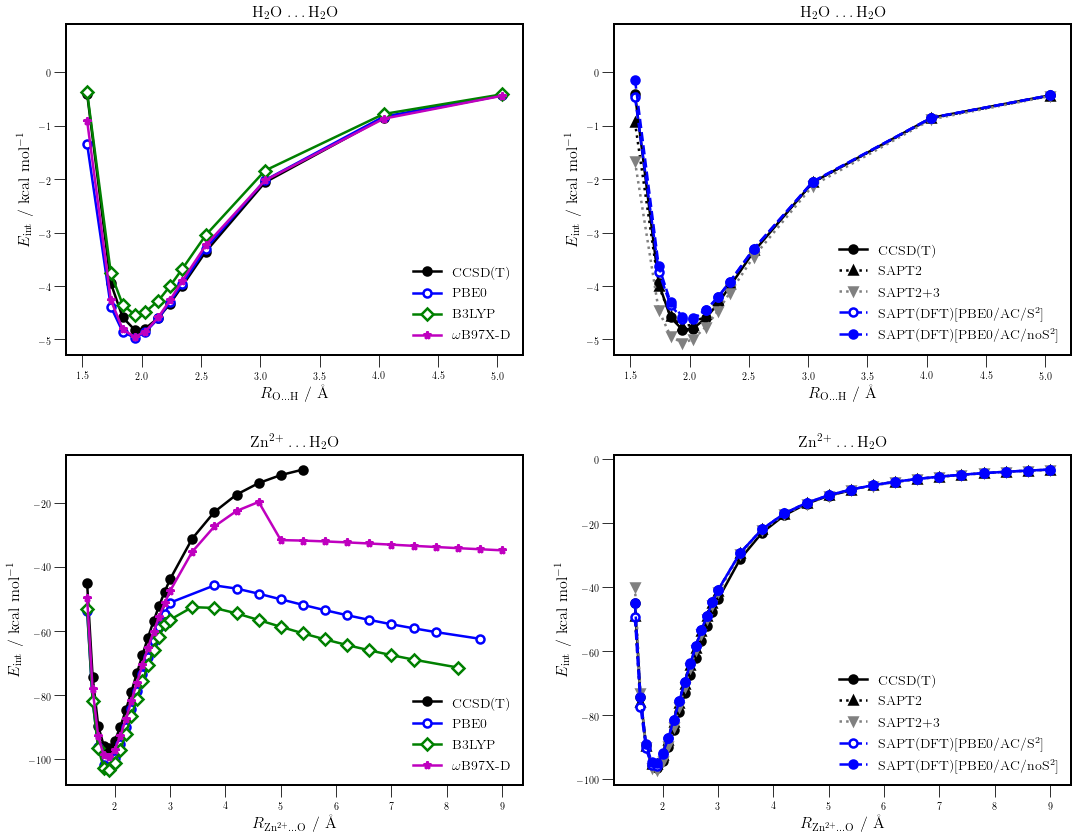

In [14]:
#cc_alpha = 0.4 # Control the alpha value of the CCSD(T) curves to stop them from being intrusive

#Xlabel = 'd / \u00c5'
Xlabel_W=''r'$R_{\mathrm{O\dots H}}$ / $\mathrm{\AA}$'''
Xlabel_Zn=''r'$R_{\mathrm{Zn^{2+}\dots O}}$ / $\mathrm{\AA}$'''
Xlabel_F=''r'$R_{\mathrm{F^-\dots H}}$ / $\mathrm{\AA}$'''
Ylabel = '$E_{\mathrm{int}}$ / kcal mol$^{-1}$'
Title_W = 'H$_{2}$O \dots H$_{2}$O'
Title_Zn = 'Zn$^{2+}$ \dots H$_{2}$O' 
Title_F = 'F$^{-}$ \dots H$_{2}$O' 

#Eint2  = '$E\mathrm{_{int}^{[2]}}$'

#fig = plt.figure(figsize=(21,15)) # taille horizontale x verticale
#fig, grph = plt.subplots(2, 2, figsize=(15,2*6))
fig2, grph = plt.subplots(2, 2, figsize=(18,2*7))

##########
# H20..H2O
##########

grph[0, 0].plot(d['water2']['d'],cc_ref['water2']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[0, 0].plot(d['water2']['d'],dft_pbe0['water2']['Eint'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'PBE0')
grph[0, 0].plot(d['water2']['d'],dft_b3lyp['water2']['Eint'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'B3LYP')
grph[0, 0].plot(d['water2']['d'],dft_wb97xd['water2']['SCF-TOT'], 
                'm', linestyle='-', marker='*', markerfacecolor='white',
                label=r'$\omega$B97X-D')
grph[0, 0].set_xlabel(Xlabel_W)
grph[0, 0].set_ylabel(Ylabel)
grph[0, 0].set_ylim(-5.3,+0.9)
grph[0, 0].legend(loc='lower right',frameon=False)
grph[0, 0].set_title(Title_W)

grph[0, 1].plot(d['water2']['d'],cc_ref['water2']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[0, 1].plot(d['water2']['d'],sapt2['water2']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'SAPT2')
grph[0, 1].plot(d['water2']['d'],sapt2p3['water2']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'SAPT2+3')
grph[0, 1].plot(d['water2']['d'],saptdft_pbe0_s2['water2']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'SAPT(DFT)[PBE0/AC/S$^2$]')
grph[0, 1].plot(d['water2']['d'],saptdft_pbe0['water2']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'SAPT(DFT)[PBE0/AC/noS$^2$]')
#grph[0, 1].plot(d['water2']['d'],saptdft_b3lyp['water2']['Eint'], 
     #           'g', linestyle='--', marker='D', markerfacecolor='g',
       #         label=r'SAPT(DFT)[B3LYP/AC/noS$^2$]')
grph[0, 1].set_xlabel(Xlabel_W)
grph[0, 1].set_ylabel(Ylabel)
grph[0, 1].set_ylim(-5.3,+0.9)
grph[0, 1].legend(loc='lower right',frameon=False)
grph[0, 1].set_title(Title_W)

##########
# Zn..H2O
##########
grph[1, 0].plot(cc_ref['zn_h2o_lr']['d'],cc_ref['zn_h2o_lr']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[1, 0].plot(dft_pbe0['zn_h2o_lr']['d'],dft_pbe0['zn_h2o_lr']['Eint'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'PBE0')
grph[1, 0].plot(dft_b3lyp['zn_h2o_lr']['d'],dft_b3lyp['zn_h2o_lr']['Eint'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'B3LYP')
grph[1, 0].plot(dft_wb97xd['zn_h2o_lr']['d'],dft_wb97xd['zn_h2o_lr']['Eint'], 
                'm', linestyle='-', marker='*', markerfacecolor='white',
                label=r'$\omega$B97X-D')
grph[1, 0].set_xlabel(Xlabel_Zn)
grph[1, 0].set_ylabel(Ylabel)
#grph[1, 0].set_ylim(-109.0,-38.0)
grph[1, 0].legend(loc='lower right',frameon=False)
grph[1, 0].set_title(Title_Zn)

grph[1, 1].plot(cc_ref['zn_h2o_lr']['d'],cc_ref['zn_h2o_lr']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[1, 1].plot(sapt2['zn_h2o_lr']['d'],sapt2['zn_h2o_lr']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'SAPT2')
grph[1, 1].plot(sapt2p3['zn_h2o_lr']['d'],sapt2p3['zn_h2o_lr']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'SAPT2+3')
grph[1, 1].plot(saptdft_pbe0_s2['zn_h2o_lr']['d'],saptdft_pbe0_s2['zn_h2o_lr']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'SAPT(DFT)[PBE0/AC/S$^2$]')
grph[1, 1].plot(saptdft_pbe0['zn_h2o_lr']['d'],saptdft_pbe0['zn_h2o_lr']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'SAPT(DFT)[PBE0/AC/noS$^2$]')
#grph[1, 1].plot(d['zn_h2o']['d'],saptdft_b3lyp['zn_h2o']['Eint'], 
   #             'g', linestyle='--', marker='D', markerfacecolor='g',
      #          label=r'SAPT(DFT)[B3LYP/AC/noS$^2$]')
grph[1, 1].set_xlabel(Xlabel_Zn)
grph[1, 1].set_ylabel(Ylabel)
#grph[1, 1].set_ylim(-109.0,-38.0)
grph[1, 1].legend(loc='lower right',frameon=False)
grph[1, 1].set_title(Title_Zn)


In [15]:
#fig2.savefig('TOT_SAPT_SAPTDFT_DFT_water2_zn-h2o_noS2_lr.pdf')

Same for the anion..water interactions

Text(0.5, 1.0, 'OH$^{-}$ \\dots H$_{2}$O')

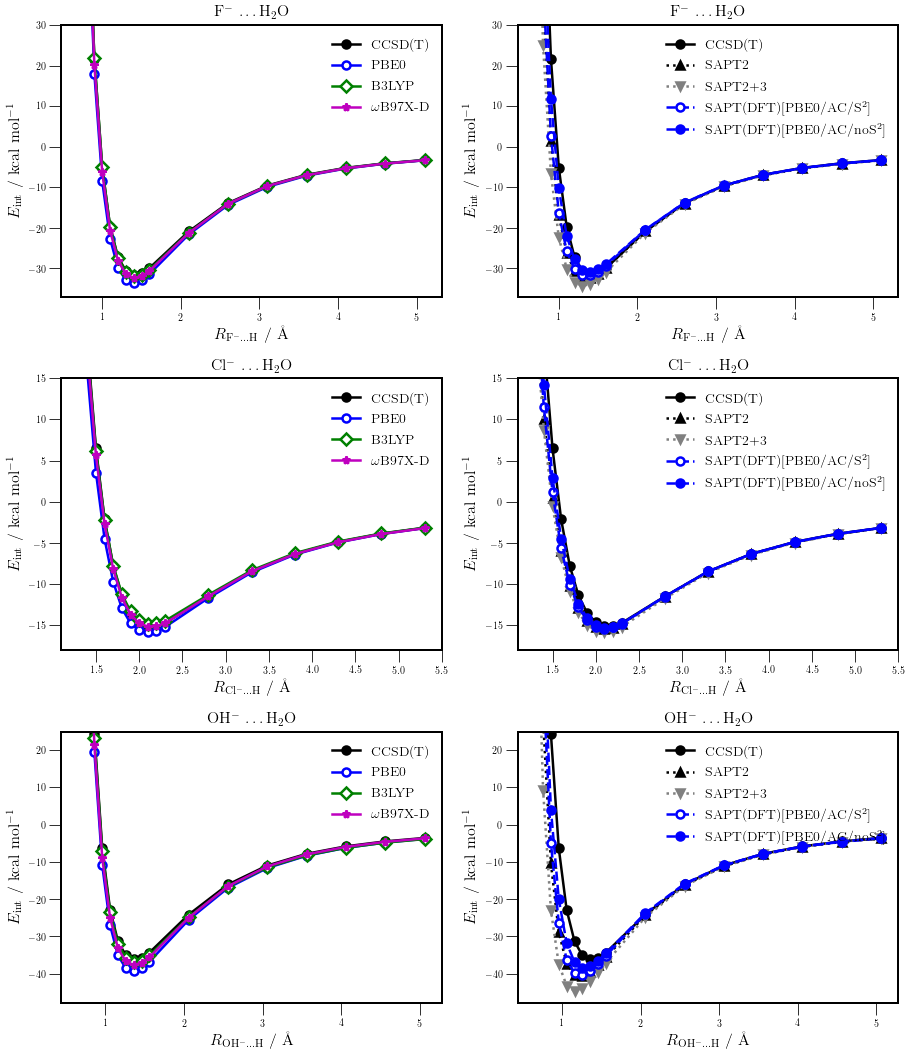

In [16]:
#cc_alpha = 0.4 # Control the alpha value of the CCSD(T) curves to stop them from being intrusive

#Xlabel = 'd / \u00c5'
Xlabel_W=''r'$R_{\mathrm{O\dots H}}$ / $\mathrm{\AA}$'''
Xlabel_Zn=''r'$R_{\mathrm{Zn^{2+}\dots O}}$ / $\mathrm{\AA}$'''
Xlabel_F=''r'$R_{\mathrm{F^-\dots H}}$ / $\mathrm{\AA}$'''
Xlabel_OH=''r'$R_{\mathrm{OH^-\dots H}}$ / $\mathrm{\AA}$'''
Xlabel_Cl=''r'$R_{\mathrm{Cl^-\dots H}}$ / $\mathrm{\AA}$'''

Title_W = 'H$_{2}$O \dots H$_{2}$O'
Title_Zn = 'Zn$^{2+}$ \dots H$_{2}$O' 
Title_F = 'F$^{-}$ \dots H$_{2}$O' 
Title_OH = 'OH$^{-}$ \dots H$_{2}$O' 
Title_Cl = 'Cl$^{-}$ \dots H$_{2}$O' 

Ylabel = '$E_{\mathrm{int}}$ / kcal mol$^{-1}$'

#Eint2  = '$E\mathrm{_{int}^{[2]}}$'

#fig = plt.figure(figsize=(21,15)) # taille horizontale x verticale
#fig3, grph = plt.subplots(3, 2, figsize=(15,2*6))
fig3, grph = plt.subplots(3, 2, figsize=(15,3*6))

##########
# F..H2O
##########
grph[0, 0].plot(d['f_h2o']['d'],cc_ref['f_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[0, 0].plot(d['f_h2o']['d'],dft_pbe0['f_h2o']['SCF-TOT'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'PBE0')
grph[0, 0].plot(d['f_h2o']['d'],dft_b3lyp['f_h2o']['SCF-TOT'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'B3LYP')
grph[0, 0].plot(d['f_h2o']['d'],dft_wb97xd['f_h2o']['SCF-TOT'], 
                'm', linestyle='-', marker='*', markerfacecolor='white',
                label=r'$\omega$B97X-D')
grph[0, 0].set_xlabel(Xlabel_F)
grph[0, 0].set_ylabel(Ylabel)
grph[0, 0].set_ylim(-37.0,+30.0)
grph[0, 0].legend(loc='upper right',frameon=False)
grph[0, 0].set_title(Title_F)

grph[0, 1].plot(d['f_h2o']['d'],cc_ref['f_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[0, 1].plot(d['f_h2o']['d'],sapt2['f_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'SAPT2')
grph[0, 1].plot(d['f_h2o']['d'],sapt2p3['f_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'SAPT2+3')
grph[0, 1].plot(d['f_h2o']['d'],saptdft_pbe0_s2['f_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'SAPT(DFT)[PBE0/AC/S$^2$]')
grph[0, 1].plot(d['f_h2o']['d'],saptdft_pbe0['f_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'SAPT(DFT)[PBE0/AC/noS$^2$]')
grph[0, 1].set_xlabel(Xlabel_F)
grph[0, 1].set_ylabel(Ylabel)
grph[0, 1].set_ylim(-37.0,+30.0)
grph[0, 1].legend(loc='upper right',frameon=False)
grph[0, 1].set_title(Title_F)

##########
# Cl..H2O
##########
grph[1, 0].plot(d['cl_h2o']['d'],cc_ref['cl_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[1, 0].plot(d['cl_h2o']['d'],dft_pbe0['cl_h2o']['SCF-TOT'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'PBE0')
grph[1, 0].plot(d['cl_h2o']['d'],dft_b3lyp['cl_h2o']['SCF-TOT'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'B3LYP')
grph[1, 0].plot(d['cl_h2o']['d'],dft_wb97xd['cl_h2o']['SCF-TOT'], 
                'm', linestyle='-', marker='*', markerfacecolor='white',
                label=r'$\omega$B97X-D')
grph[1, 0].set_xlabel(Xlabel_Cl)
grph[1, 0].set_ylabel(Ylabel)
grph[1, 0].set_ylim(-18.0,+15.0)
grph[1, 0].legend(loc='upper right',frameon=False)
grph[1, 0].set_title(Title_Cl)

grph[1, 1].plot(d['cl_h2o']['d'],cc_ref['cl_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[1, 1].plot(d['cl_h2o']['d'],sapt2['cl_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'SAPT2')
grph[1, 1].plot(d['cl_h2o']['d'],sapt2p3['cl_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'SAPT2+3')
grph[1, 1].plot(d['cl_h2o']['d'],saptdft_pbe0_s2['cl_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'SAPT(DFT)[PBE0/AC/S$^2$]')
grph[1, 1].plot(d['cl_h2o']['d'],saptdft_pbe0['cl_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'SAPT(DFT)[PBE0/AC/noS$^2$]')
grph[1, 1].set_xlabel(Xlabel_Cl)
grph[1, 1].set_ylabel(Ylabel)
grph[1, 1].set_ylim(-18.0,+15.0)
grph[1, 1].legend(loc='upper right',frameon=False)
grph[1, 1].set_title(Title_Cl)

##########
# OH..H2O
##########
grph[2, 0].plot(d['oh_h2o']['d'],cc_ref['oh_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[2, 0].plot(d['oh_h2o']['d'],dft_pbe0['oh_h2o']['SCF-TOT'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'PBE0')
grph[2, 0].plot(d['oh_h2o']['d'],dft_b3lyp['oh_h2o']['SCF-TOT'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'B3LYP')
grph[2, 0].plot(d['oh_h2o']['d'],dft_wb97xd['oh_h2o']['SCF-TOT'], 
                'm', linestyle='-', marker='*', markerfacecolor='white',
                label=r'$\omega$B97X-D')
grph[2, 0].set_xlabel(Xlabel_OH)
grph[2, 0].set_ylabel(Ylabel)
grph[2, 0].set_ylim(-48.0,+25.0)
grph[2, 0].legend(loc='upper right',frameon=False)
grph[2, 0].set_title(Title_OH)

grph[2, 1].plot(d['oh_h2o']['d'],cc_ref['oh_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[2, 1].plot(d['oh_h2o']['d'],sapt2['oh_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'SAPT2')
grph[2, 1].plot(d['oh_h2o']['d'],sapt2p3['oh_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'SAPT2+3')
grph[2, 1].plot(d['oh_h2o']['d'],saptdft_pbe0_s2['oh_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'SAPT(DFT)[PBE0/AC/S$^2$]')
grph[2, 1].plot(d['oh_h2o']['d'],saptdft_pbe0['oh_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'SAPT(DFT)[PBE0/AC/noS$^2$]')
grph[2, 1].set_xlabel(Xlabel_OH)
grph[2, 1].set_ylabel(Ylabel)
grph[2, 1].set_ylim(-48.0,+25.0)
grph[2, 1].legend(loc='upper right',frameon=False)
grph[2, 1].set_title(Title_OH)

In [17]:
#fig3.savefig('TOT_SAPT_SAPTDFT_DFT_anion-h2o_noS2.pdf')